In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

import shap

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
data = pd.read_csv('https://drive.google.com/uc?id=1mbTGKWDut-R-VS0X3Ae0G4KFy45vGtTn')

In [41]:
data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


For analysing the revenue classes, we might require some other variables that will more appropriately describe our revenue classes:
1. Revenue per customer
2. Marketing Efficiency
3. Employee Productivity
4. Foot Traffic Conversion

In order ti keep the original data intact, i will create a copy and make the necessary changes

In [42]:
# create a copy of the dataframe data

data1 = data.copy()

In [43]:
# Revenue per Customer
data1['Revenue_Per_Customer'] = data1['Daily_Revenue'] / data1['Number_of_Customers_Per_Day']

# Marketing Efficiency (Revenue per $ spent on Marketing)
data1['Marketing_Efficiency'] = data1['Daily_Revenue'] / data1['Marketing_Spend_Per_Day']

# Employee Productivity (Revenue per Employee)
data1['Employee_Productivity'] = data1['Daily_Revenue'] / data1['Number_of_Employees']

# Foot Traffic Conversion Rate (Customers vs. Foot Traffic)
data1['Foot_Traffic_Conversion'] = data1['Number_of_Customers_Per_Day'] / data1['Location_Foot_Traffic']

In [44]:
data1.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Per_Customer,Marketing_Efficiency,Employee_Productivity,Foot_Traffic_Conversion
0,152,6.74,14,4,106.62,97,1547.81,10.182961,14.517070,386.952500,1.567010
1,485,4.50,12,8,57.83,744,2084.68,4.298309,36.048418,260.585000,0.651882
2,398,9.09,6,6,91.76,636,3118.39,7.835151,33.984198,519.731667,0.625786
3,320,8.48,17,4,462.63,770,2912.20,9.100625,6.294879,728.050000,0.415584
4,156,7.44,17,2,412.52,232,1663.42,10.662949,4.032338,831.710000,0.672414


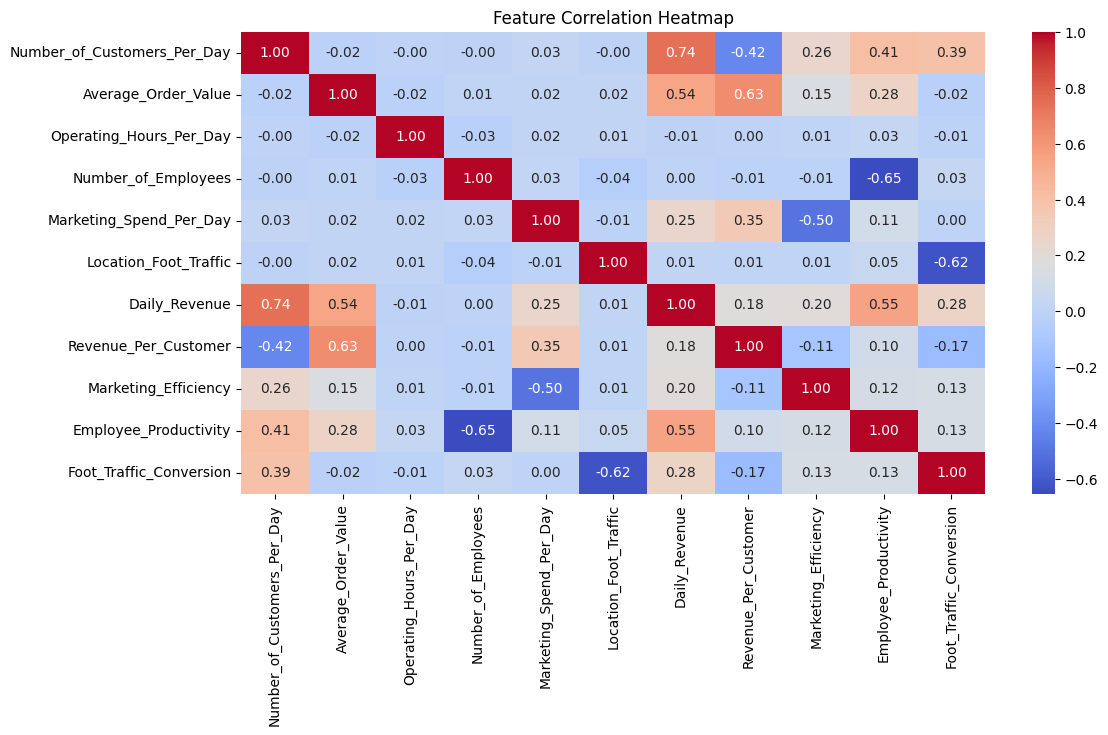

In [45]:
plt.figure(figsize=(12, 6))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In trying to understand if there is a need to drop some highly correlated columns that we derived the other columns from, looks like the correlation is moderate at best. So we can still keep all of the data

In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  1999 non-null   int64  
 1   Average_Order_Value          1999 non-null   float64
 2   Operating_Hours_Per_Day      1999 non-null   int64  
 3   Number_of_Employees          1999 non-null   int64  
 4   Marketing_Spend_Per_Day      1999 non-null   float64
 5   Location_Foot_Traffic        1999 non-null   int64  
 6   Daily_Revenue                1999 non-null   float64
 7   Revenue_Per_Customer         1999 non-null   float64
 8   Marketing_Efficiency         1999 non-null   float64
 9   Employee_Productivity        1999 non-null   float64
 10  Foot_Traffic_Conversion      1999 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 171.9 KB


## **FEATURE TRANSFORMATION**

Performing scaling and normalization for machine learning modeling to start



In [47]:
# Select numerical features for scaling
features_to_scale = ['Number_of_Customers_Per_Day', 'Average_Order_Value',
                     'Operating_Hours_Per_Day', 'Number_of_Employees',
                     'Marketing_Spend_Per_Day', 'Location_Foot_Traffic',
                     'Revenue_Per_Customer', 'Marketing_Efficiency',
                     'Employee_Productivity', 'Foot_Traffic_Conversion']

# Apply StandardScaler, and modifying original columns into scaled ones
# NOTE: We are not touching the target column (Daily_Revenue) as it has to be turned into classes in the next step
scaler = StandardScaler()
data1[features_to_scale] = scaler.fit_transform(data1[features_to_scale])

In [48]:
data1.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Per_Customer,Marketing_Efficiency,Employee_Productivity,Foot_Traffic_Conversion
0,-0.946213,0.219524,0.678186,-1.056185,-1.035987,-1.611981,1547.81,0.845517,0.059388,0.174799,0.714921
1,1.628038,-0.810341,0.096468,0.013376,-1.381925,0.769664,2084.68,-1.080511,1.115307,-0.243186,-0.180444
2,0.955486,1.299963,-1.648687,-0.521404,-1.141349,0.372109,3118.39,0.077086,1.014075,0.613991,-0.205976
3,0.352508,1.019509,1.550764,-1.056185,1.488246,0.865371,2912.20,0.491272,-0.343836,1.303043,-0.411638
4,-0.915291,0.541357,1.550764,-1.590965,1.132949,-1.115039,1663.42,1.002616,-0.454793,1.645918,-0.160355


### **ENCODING THE TARGET VARIABLE - Daily_Revenue**



In [49]:
""" For classification, I have chosen to divide the revenue into 4 classes:
Instead of just Low, Medium, High, we now categorize revenue into:

Low (Revenue below $1000)
Medium (Between $1000 and $2000)
High (Between $2000 and $3500)
Very High (Over $3500)

Normally 3 classes can be taken but I would like to understand the outlier revenue class a bit better"""

' For classification, I have chosen to divide the revenue into 4 classes:\nInstead of just Low, Medium, High, we now categorize revenue into:\n\nLow (Revenue below $1000)\nMedium (Between $1000 and $2000)\nHigh (Between $2000 and $3500)\nVery High (Over $3500)\n\nNormally 3 classes can be taken but I would like to understand the outlier revenue class a bit better'

In [50]:
# prompt: Can we create class based on values i choose. I want classification based on the Daily_Revenue values being divided and not the count

# Assuming data1 DataFrame from the previous code is available

# Define custom revenue thresholds (example values)
low_threshold = 1000  # Example: Daily Revenue below 1000
medium_threshold = 2000  # Example: Daily Revenue between 1000 and 2000
high_threshold = 3500  # Example: Daily Revenue between 2000 and 3500

# Create the custom revenue class based on your thresholds
def classify_revenue(revenue):
    if revenue < low_threshold:
        return 'Low'
    elif revenue < medium_threshold:
        return 'Medium'
    elif revenue < high_threshold:
        return 'High'
    else:
        return 'Very High'

# Apply the function to the Daily_Revenue column
data1['Custom_Revenue_Class'] = data1['Daily_Revenue'].apply(classify_revenue)

# Check the distribution of the custom classes
print(data1['Custom_Revenue_Class'].value_counts())


Custom_Revenue_Class
Medium       795
High         651
Low          393
Very High    160
Name: count, dtype: int64


In [51]:
# prompt: encode the revenue class created

# Encode Custom Revenue Class
le = LabelEncoder()
data1['Custom_Revenue_Class'] = le.fit_transform(data1['Custom_Revenue_Class'])


In [52]:
data1.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue,Revenue_Per_Customer,Marketing_Efficiency,Employee_Productivity,Foot_Traffic_Conversion,Custom_Revenue_Class
0,-0.946213,0.219524,0.678186,-1.056185,-1.035987,-1.611981,1547.81,0.845517,0.059388,0.174799,0.714921,2
1,1.628038,-0.810341,0.096468,0.013376,-1.381925,0.769664,2084.68,-1.080511,1.115307,-0.243186,-0.180444,0
2,0.955486,1.299963,-1.648687,-0.521404,-1.141349,0.372109,3118.39,0.077086,1.014075,0.613991,-0.205976,0
3,0.352508,1.019509,1.550764,-1.056185,1.488246,0.865371,2912.20,0.491272,-0.343836,1.303043,-0.411638,0
4,-0.915291,0.541357,1.550764,-1.590965,1.132949,-1.115039,1663.42,1.002616,-0.454793,1.645918,-0.160355,2


In [53]:
# Display the mapping between encoded revenue classes and their original labels
print("Encoded Revenue Class Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")


Encoded Revenue Class Mapping:
0: High
1: Low
2: Medium
3: Very High


In [54]:
data1.shape

(1999, 12)

## **MODELING**

**TRAIN-TEST SPLIT:**


In [55]:
#  Perform the train test split for modeling

# Define features (X) and target (y)
X = data1.drop(['Daily_Revenue', 'Custom_Revenue_Class'], axis=1)
y = data1['Custom_Revenue_Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y) # 80% train, 20% test

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1599, 10)
X_test shape: (400, 10)
y_train shape: (1599,)
y_test shape: (400,)


### **MODEL 1: XGBoost**

In [56]:
# XGBoost Model
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],          # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage used in update to prevents overfitting
    'subsample': [0.8, 1.0],       # Fraction of samples used for fitting the trees
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params_xgb = grid_search_xgb.best_params_
best_xgb_classifier = grid_search_xgb.best_estimator_

print("Best Hyperparameters (XGBoost):", best_params_xgb)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb_classifier.predict(X_test)


Best Hyperparameters (XGBoost): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [57]:
# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       130
           1       0.91      0.95      0.93        79
           2       0.95      0.94      0.95       159
           3       0.97      0.94      0.95        32

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



The model performs very well across all classes with high precision, recall, and F1-score, especially for class 0 and class 3.
* High Accuracy (95%) – The model correctly classifies 95% of test samples, indicating strong overall performance.

* Balanced Precision & Recall – Precision and recall are consistently high (around 0.95-0.97) across all classes, meaning the model effectively minimizes both false positives and false negatives.

*  Strong Performance for All Classes – No single class is disproportionately misclassified, with F1-scores above 0.95 for each category.

* Handles Class Imbalance Well – Even the smallest class (class 3, with 29 instances) is well predicted (97% recall), showing robustness in handling different class distributions.

* Reliable for Revenue Classification – The model can effectively distinguish between different revenue patterns, making it a solid choice for predicting coffee shop revenue categories.

In [58]:
print(confusion_matrix(y_test,y_pred_xgb))

[[125   0   4   1]
 [  0  75   4   0]
 [  2   7 150   0]
 [  2   0   0  30]]


**CONFUSION MATRIX:**
The model seems to perform well overall.

* Strong classification performance – Most predictions are along the diagonal, meaning high accuracy.
* Few misclassifications – Only a small percentage of instances are misclassified.
* Class 2 (High Revenue) has the most confusion – Some instances are misclassified as Class 0 or 1.
* No major bias towards a specific class – The model maintains balance across different revenue categories.


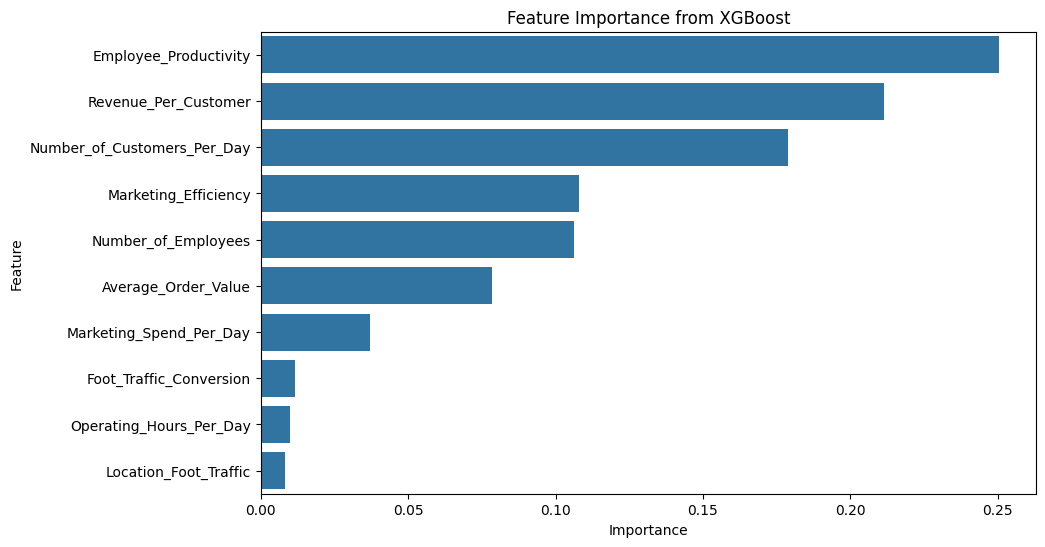

In [59]:
#Feature Importance from XGBoost Classifier
importances = best_xgb_classifier.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from XGBoost')
plt.show()


This bar chart shows the importance of different features in predicting coffee shop revenue categories.

**Top Features & Their Impact:**
Employee_Productivity (Most Important)

* **Employee Productivity is the biggest driver of revenue patterns.** Investing in staff training and efficiency improvements could boost revenue.
* **Customer-related metrics (Revenue Per Customer, Number of Customers) are crucial.** Strategies to increase customer spending or footfall (number of people who visit a place within a given time period) will have a big impact.
*  **Marketing must be efficient, not just expensive.** Optimizing marketing strategies is more important than just increasing ad spend.
* **Location Foot Traffic is not a strong predictor.** Just being in a busy area does not automatically lead to high revenue.

ExactExplainer explainer: 401it [02:39,  2.36it/s]


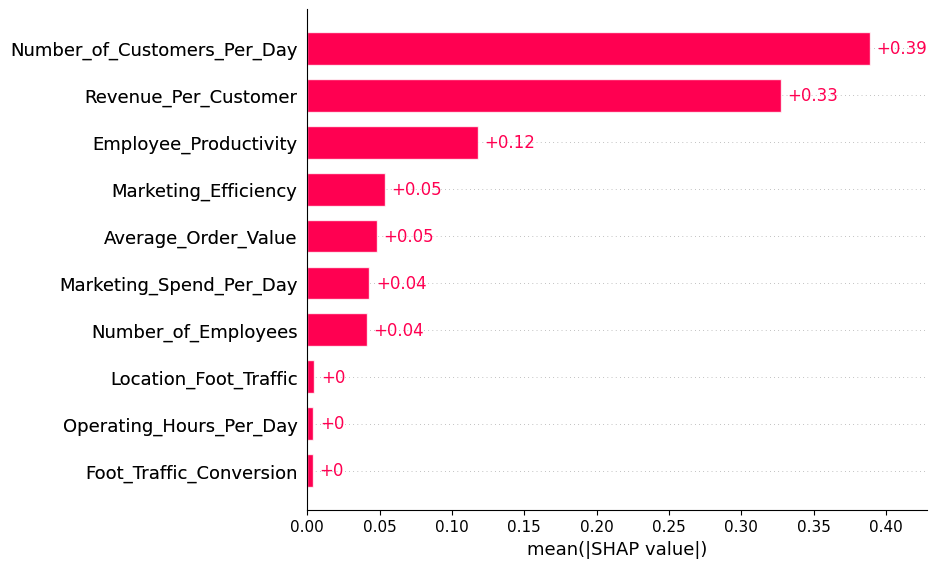

In [60]:
explainer = shap.Explainer(best_xgb_classifier.predict, X_train)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

#### **MODEL 2: Random Forest**

In [61]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)

# Evaluate the best model on the test set
y_pred_rf = best_rf_classifier.predict(X_test)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [62]:
# Print the classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       130
           1       0.86      0.89      0.88        79
           2       0.89      0.91      0.90       159
           3       0.97      0.91      0.94        32

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [63]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_rf))

[[121   0   8   1]
 [  0  70   9   0]
 [  4  11 144   0]
 [  3   0   0  29]]


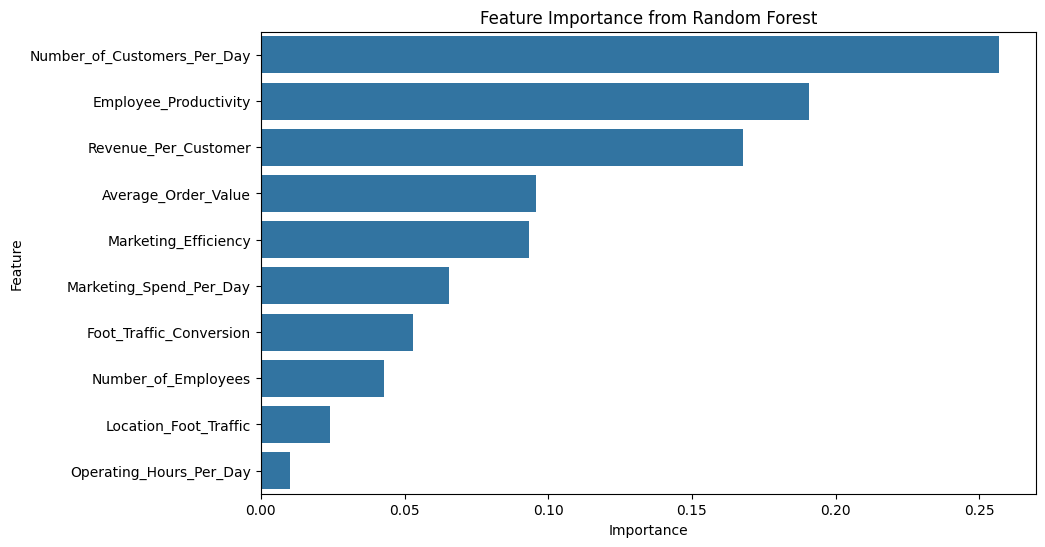

In [64]:
#Feature Importance from Random Forest Classifier
importances = best_rf_classifier.feature_importances_
feature_names = X_train.columns
importance_df2 = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df2)
plt.title('Feature Importance from Random Forest')
plt.show()

**TAKEAWAY**:
1. XGBoost generally outperforms Random Forest in terms of accuracy, precision, recall, and F1-score across all classes.
2. Class 2 (High Revenue) has fewer misclassifications in XGBoost (4 vs. 8 in Random Forest).
3. Class 3 (Very High Revenue) is well-handled by both models.
4. XGBoost has fewer misclassifications compared to Random Forest, leading to better recall.


#### **MODEL 3: K-Nearest Neighbors (KNN)**

In [65]:
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_

print("Best Hyperparameters for KNN:", best_params_knn)

# Evaluate the best model on the test set
y_pred_knn = best_knn_classifier.predict(X_test)


Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [66]:
# Print the classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       130
           1       0.84      0.77      0.80        79
           2       0.81      0.85      0.83       159
           3       0.86      0.75      0.80        32

    accuracy                           0.83       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.83      0.83      0.83       400



In [67]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_knn))

[[112   0  14   4]
 [  0  61  18   0]
 [ 12  12 135   0]
 [  8   0   0  24]]


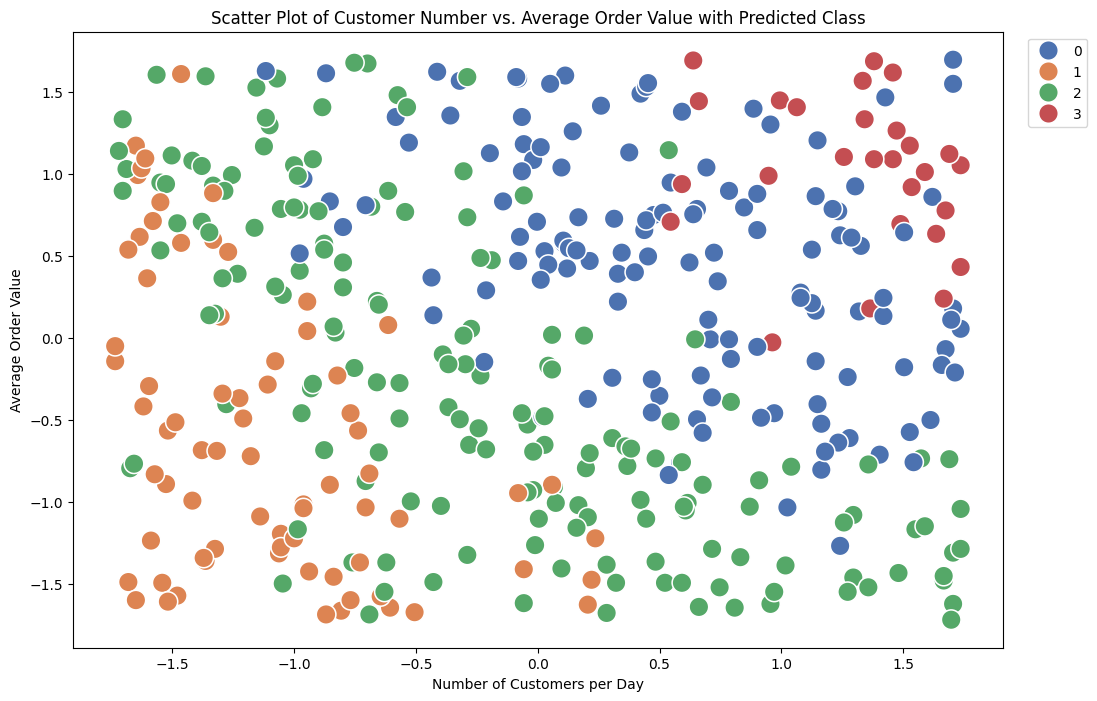

In [68]:
# scatterplot to see if the classes are predicted correctly

# Convert y_pred to a DataFrame for easier plotting with X_test
y_pred_df = pd.DataFrame({'Predicted_Class': y_pred_knn})

# Concatenate X_test and y_pred_df for plotting
plot_data = pd.concat([X_test.reset_index(drop=True), y_pred_df], axis=1)

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Number_of_Customers_Per_Day', y='Average_Order_Value', hue='Predicted_Class', data=plot_data, palette='deep', s = 200)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.title('Scatter Plot of Customer Number vs. Average Order Value with Predicted Class')
plt.xlabel('Number of Customers per Day')
plt.ylabel('Average Order Value')
plt.show()


**Encoded Revenue Class Mapping:**
* 0: High
* 1: Low
* 2: Medium
* 3: Very High

There does seem to be incorrect classification, espicially between class1 and class2

#### **MODEL 4: Support Vector Machine (SVM)**

In [69]:
svm_classifier = SVC(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params_svm = grid_search_svm.best_params_
best_svm_classifier = grid_search_svm.best_estimator_

print("Best Hyperparameters for SVM:", best_params_svm)

# Evaluate the best model on the test set
y_pred_svm = best_svm_classifier.predict(X_test)


Best Hyperparameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [70]:
# Print the classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       130
           1       0.88      0.96      0.92        79
           2       0.93      0.91      0.92       159
           3       0.88      0.88      0.88        32

    accuracy                           0.92       400
   macro avg       0.90      0.91      0.91       400
weighted avg       0.92      0.92      0.91       400



In [71]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_svm))

[[118   0   8   4]
 [  0  76   3   0]
 [  5  10 144   0]
 [  4   0   0  28]]


### **MODEL EVALUATION**

In [72]:
# Dataframe of evaluation matrix
models = ['XGBoost', 'Random Forest', 'K-Nearest Neighbors', 'SVM']
y_preds = [y_pred_xgb, y_pred_rf, y_pred_knn, y_pred_svm]

evaluation_matrix = []
for model, y_pred in zip(models, y_preds):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Use weighted for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    evaluation_matrix.append([model, accuracy, precision, recall, f1])

df_eval = pd.DataFrame(evaluation_matrix, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_eval


,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.950,0.950355,0.950,0.950086
1,Random Forest,0.910,0.910767,0.910,0.910246
2,K-Nearest Neighbors,0.830,0.830696,0.830,0.829600
3,SVM,0.915,0.915794,0.915,0.914969


CONCLUSION:

* From the evaluation matrix it is clear that XGBoost is the best performing classification model that can best classify the revenue classes with an accuracy of 95.2%.
* KNN seems to perform worst with only 79% accuracy.

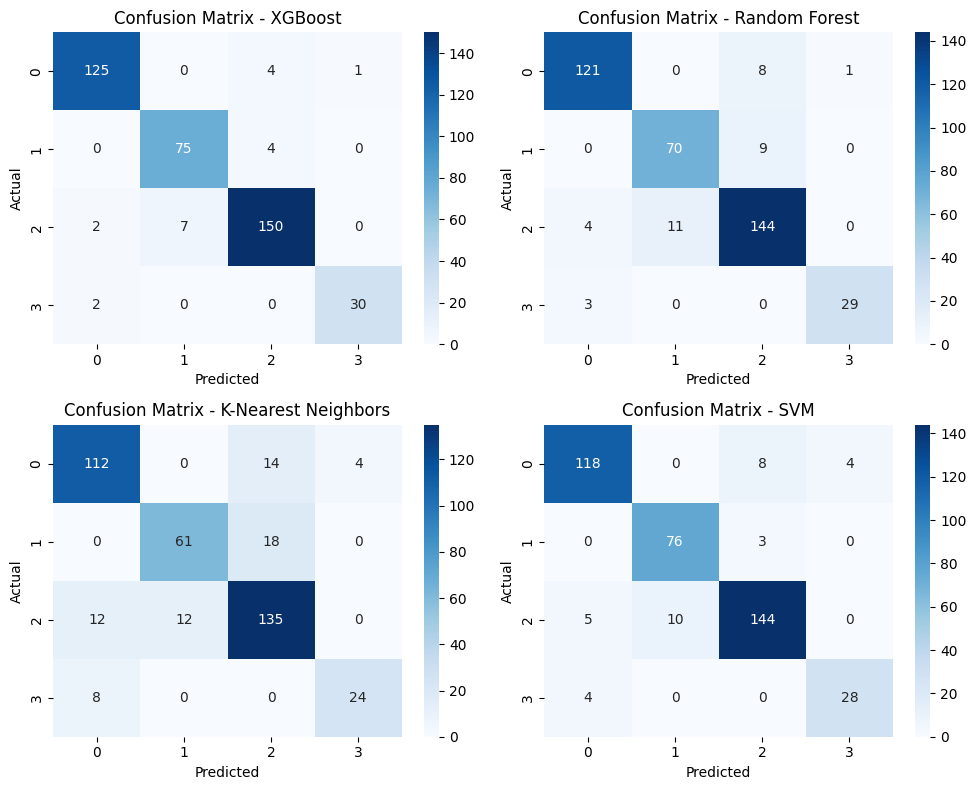

In [73]:
#confusion matrices for all models

models = {
    'XGBoost': y_pred_xgb,
    'Random Forest': y_pred_rf,
    'K-Nearest Neighbors': y_pred_knn,
    'SVM': y_pred_svm
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()  # Flatten the axes array for easier iteration

for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model_name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()
